## Stocks Portfolio Analysis - version 1.0
## Efficient Frontier (Markowitz)
## by Luis A. Urso
## Created: 22-Nov-2022
## Updated: 22-Nov-2022

In [2]:
## Import required libraries

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt 
%matplotlib inline

In [73]:
## Get the stocks prices 

assets =  ['ENBR3.SA','GOAU4.SA','TAEE11.SA','ITSA4.SA','EMBR3.SA']
pf_data = pd.DataFrame()

for x in assets:
    pf_data[x]=wb.DataReader(x,data_source='yahoo',start='2022-7-1')['Adj Close']
    

<AxesSubplot: xlabel='Date'>

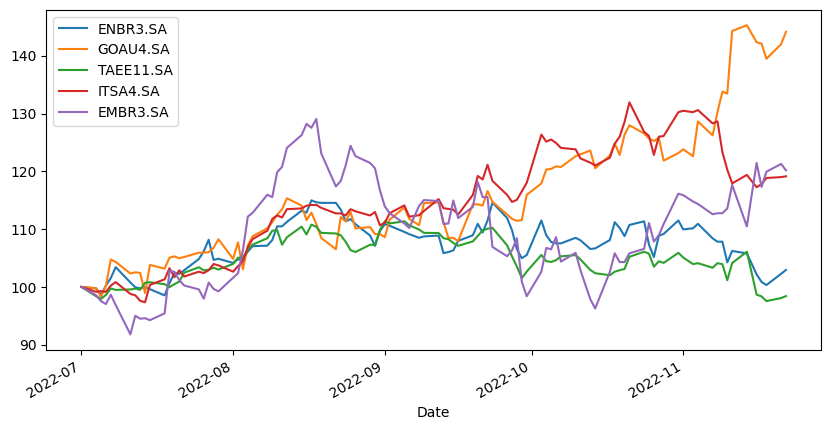

In [74]:
## See the prices graphicaly

(pf_data / pf_data.iloc[0]*100).plot(figsize=(10,5))

In [75]:
## Calculate the daily return for each asset, using continuous return method (LN(Today/Yesterday))

log_returns = np.log(pf_data/pf_data.shift(1))

In [76]:
## Define the trading period analysis: for a yearly, use 252, for monthly use 22, and daily use 1 in the variable below

trade_period = 1

## Calculate the average return per defined period

log_returns.mean() * trade_period

ENBR3.SA     0.000296
GOAU4.SA     0.003732
TAEE11.SA   -0.000162
ITSA4.SA     0.001787
EMBR3.SA     0.001876
dtype: float64

In [77]:
## Calulate the Volatility (risk) using the covariance

log_returns.cov() * trade_period

,ENBR3.SA,GOAU4.SA,TAEE11.SA,ITSA4.SA,EMBR3.SA
ENBR3.SA,0.000268,0.000106,0.000129,0.000110,0.000072
GOAU4.SA,0.000106,0.000457,0.000094,0.000112,0.000122
TAEE11.SA,0.000129,0.000094,0.000176,0.000076,-0.000025
ITSA4.SA,0.000110,0.000112,0.000076,0.000249,0.000134
EMBR3.SA,0.000072,0.000122,-0.000025,0.000134,0.000865


In [78]:
## Calculate the correlation 

log_returns.corr()

,ENBR3.SA,GOAU4.SA,TAEE11.SA,ITSA4.SA,EMBR3.SA
ENBR3.SA,1.000000,0.302177,0.594224,0.427767,0.150266
GOAU4.SA,0.302177,1.000000,0.330539,0.332506,0.193879
TAEE11.SA,0.594224,0.330539,1.000000,0.363365,-0.064097
ITSA4.SA,0.427767,0.332506,0.363365,1.000000,0.288073
EMBR3.SA,0.150266,0.193879,-0.064097,0.288073,1.000000


In [79]:
## Create 1000 variations for the assets 

portfolio_returns = []
portfolio_volatilities = []
for x in range(1000):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * trade_period)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * trade_period, weights))))
                    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)
                                  
portfolio_returns, portfolio_volatilities

(array([0.00151107, 0.00169015, 0.00151493, 0.00214932, 0.00140265,
        0.00221738, 0.00159132, 0.00141267, 0.00181276, 0.00163204,
        0.00170456, 0.00224748, 0.00189995, 0.00122511, 0.00094264,
        0.00086511, 0.00165944, 0.00097484, 0.00150956, 0.00181222,
        0.00165563, 0.00198279, 0.00239753, 0.00132431, 0.00150221,
        0.00240042, 0.0016451 , 0.00190658, 0.00267191, 0.00190586,
        0.00154385, 0.00076894, 0.00165161, 0.00118762, 0.00178953,
        0.00110309, 0.00187083, 0.00102615, 0.00223585, 0.00101036,
        0.00097985, 0.00143127, 0.00223332, 0.00138732, 0.00166057,
        0.00213874, 0.0016713 , 0.00149289, 0.00133374, 0.001422  ,
        0.00159665, 0.00173563, 0.00177357, 0.00105018, 0.00190121,
        0.0011211 , 0.00128266, 0.00112968, 0.00111232, 0.00217187,
        0.00117048, 0.00186647, 0.00146708, 0.00129984, 0.00088114,
        0.00165497, 0.00129916, 0.00159407, 0.00128811, 0.00147805,
        0.00248247, 0.00129882, 0.00192252, 0.00

In [80]:
## Expected portfolio return

np.sum(weights * log_returns.mean()) * trade_period *100

0.06993830364458851

In [81]:
## Expected portfolio volatility

np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * trade_period, weights))) * 100

1.2220220099186698

C:\Users\urso_luis_a@lilly.com\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'Expected Return')

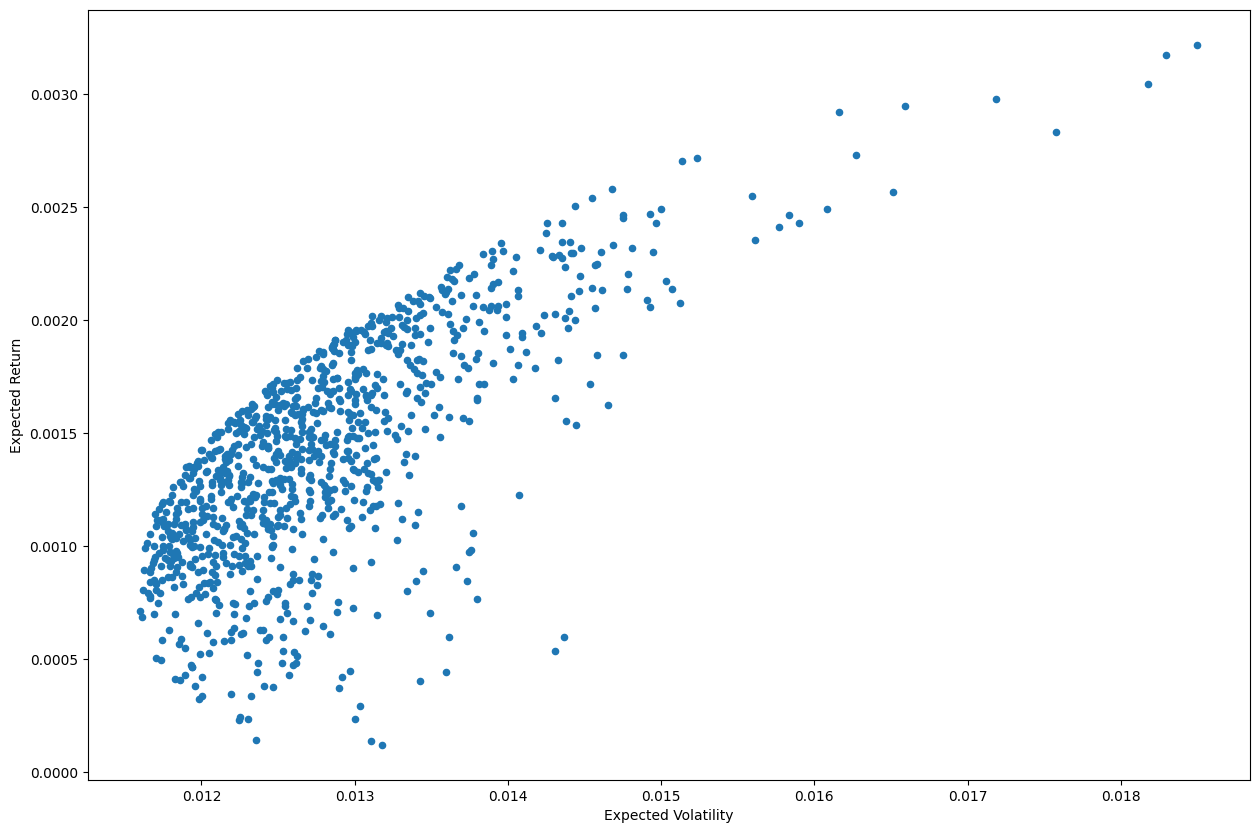

In [71]:
portfolios = pd.DataFrame({'Return': portfolio_returns, 'Volatility':portfolio_volatilities  })
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15,10));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')